In [1]:
import os
os.chdir("/Users/sanjanakotha/Desktop/Staller_Lab/consensus_predictor/notebooks")


In [2]:
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np

In [3]:
padi = pd.read_excel("../data/41586_2024_7707_MOESM2_ESM.xlsx")
padi = padi[["Fragment Sequence", "PADI Score"]]
padi = padi.rename(columns = {"Fragment Sequence" : "seq", "PADI Score": "score"})
padi["screen"] = "padi"
padi["seq"] = padi["seq"].str.strip().str.upper()
padi = padi.drop_duplicates(subset = "seq")
padi = padi.dropna()
padi

,seq,score,screen
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi
...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi


In [59]:
padi

,seq,score,screen,gaussian_score
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,3.469312e-05
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,5.505815e-01
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,2.349202e+03
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,3.287771e+02
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,1.769118e+03
...,...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi,1.594243e+03
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi,1.117178e+03
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi,2.272259e+03
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi,2.702859e+01


(-0.9541580157639098, 0.22544639538314326)

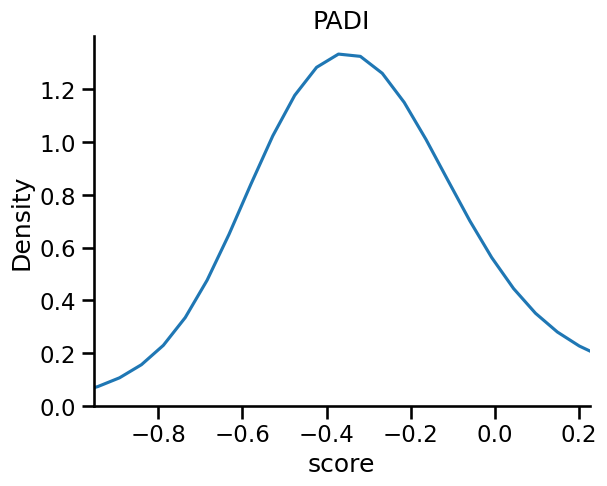

In [4]:
from scipy.stats import mode

sns.kdeplot(data=padi, x="score")
sns.despine()
plt.title("PADI");
lower_bound = np.percentile(padi["score"], 1)
upper_bound = np.percentile(padi["score"], 84)
plt.xlim(lower_bound, upper_bound)

In [5]:
gauss_fit = padi[(padi["score"] <  upper_bound) & (lower_bound < padi["score"])]
gauss_fit

,seq,score,screen
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi
5,RFQSKYKSRDAMWYFFSRRENNKGNRQSRTTVSGKWKLTG,-0.199392,padi
7,NNKGNRQSRTTVSGKWKLTGESVEVKDQWGFCSEGFRGKI,-0.290584,padi
...,...,...,...
69566,INRAAQGLPFEVVYYPTAGWSDFVVKAEDVEASMAIFWTP,-0.212885,padi
69567,EVVYYPTAGWSDFVVKAEDVEASMAIFWTPGTRVKMAMET,-0.267620,padi
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi


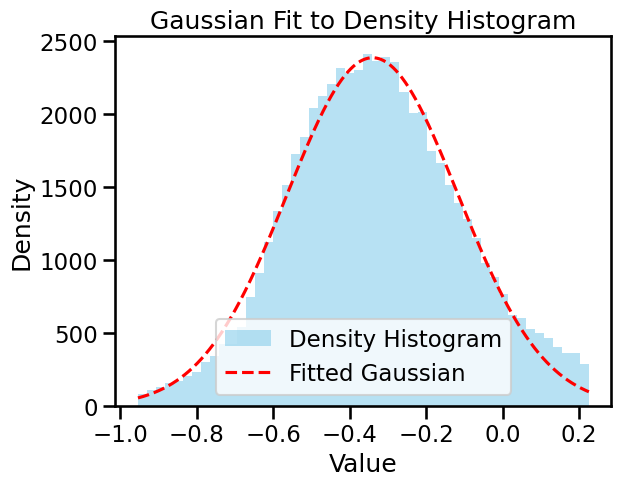

Fitted parameters:
Amplitude: 2387.102, Mean: -0.340, Sigma: 0.224


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Generate sample data (e.g., from a normal distribution)
data = gauss_fit["score"]

# Create density histogram
counts, bin_edges = np.histogram(data, bins=50, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Fit Gaussian to density data
initial_guess = [1, 0, 1]  # amplitude, mean, standard deviation
params, _ = curve_fit(gaussian, bin_centers, counts, p0=initial_guess)

# Plot the histogram and fitted Gaussian
plt.hist(data, bins=50, density=False, alpha=0.6, color='skyblue', label='Density Histogram')
x_fit = np.linspace(min(data), max(data), 1000)
plt.plot(x_fit, gaussian(x_fit, *params), 'r--', label='Fitted Gaussian')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Gaussian Fit to Density Histogram')
plt.legend()
plt.show()

print(f"Fitted parameters:\nAmplitude: {params[0]:.3f}, Mean: {params[1]:.3f}, Sigma: {params[2]:.3f}")


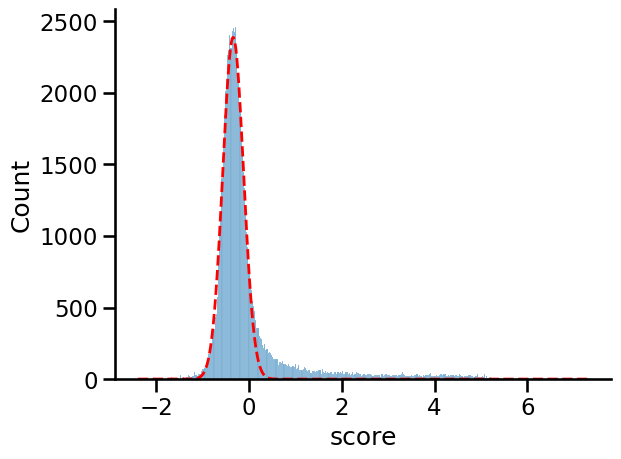

In [49]:
ax = sns.histplot(padi["score"], bins = 400, alpha=0.6, label='Density Histogram', edgecolor = 'white')
x_fit = np.linspace(min(padi["score"]), max(padi["score"]), 1000)
ax.plot(x_fit, gaussian(x_fit, *params), 'r--', label='Fitted Gaussian', lw = 2)
sns.despine()

In [54]:
padi["gaussian_score"] = padi["score"].apply(lambda s: gaussian(s, *params))
padi

,seq,score,screen,gaussian_score
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,3.469312e-05
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,5.505815e-01
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,2.349202e+03
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,3.287771e+02
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,1.769118e+03
...,...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi,1.594243e+03
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi,1.117178e+03
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi,2.272259e+03
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi,2.702859e+01


<Axes: xlabel='gaussian_score', ylabel='Count'>

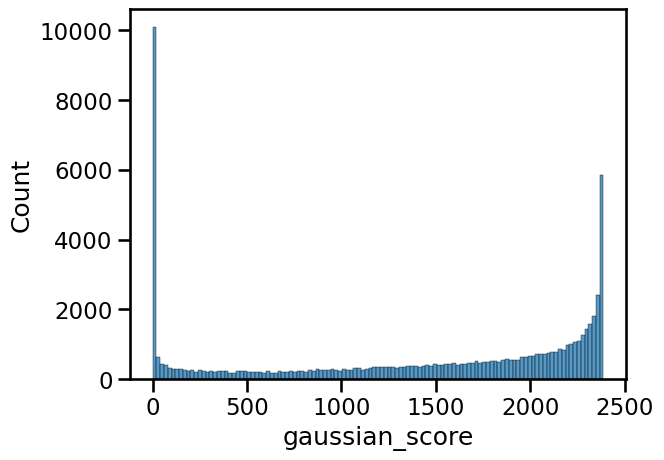

In [58]:
sns.histplot(padi["gaussian_score"], binwidth = 20)